In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import scipy.stats as stats
import missingno as msno


# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

In [2]:
my_folder = "/Users/Andy/Desktop/Documents/GitHub"
file_loc = my_folder+"/data_385k.pkl"

In [3]:
df_openfood = pd.read_pickle('data_385k.pkl', compression='zip')

In [4]:
df_openfood.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **C. In-depth Exploratory Data Analysis**

#### **1. What is the nutrients’ distribution per country? You can choose any subset of the nutrients you want to analyze (e.g. macronutrients, minerals, or vitamins).**

- We choose to analyze the distributions of vitamins per country. Therefore, we subset our dataframe to only end up with the vitamins and the country features :

In [5]:
# We are selecting only the features that contains vitamins or country in their label

df_openfood_vitamin = df_openfood.loc[:,df_openfood.columns.str.
                                               contains(r"(?:\s|^)vitamin|country(?:\s|$)", na=False)]
df_openfood_vitamin = df_openfood_vitamin.loc[:,df_openfood_vitamin.columns.str.
                                               contains(r"(?:\s|^)country|per_hundred(?:\s|$)", na=False)]
print(df_openfood_vitamin.shape)
df_openfood_vitamin.head(3)

(385384, 10)


,country,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
0,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Distributions of the vitamins per country using boxplots and boxenplots**

- We check the distributions of each of the vitamins using **boxenplots** :

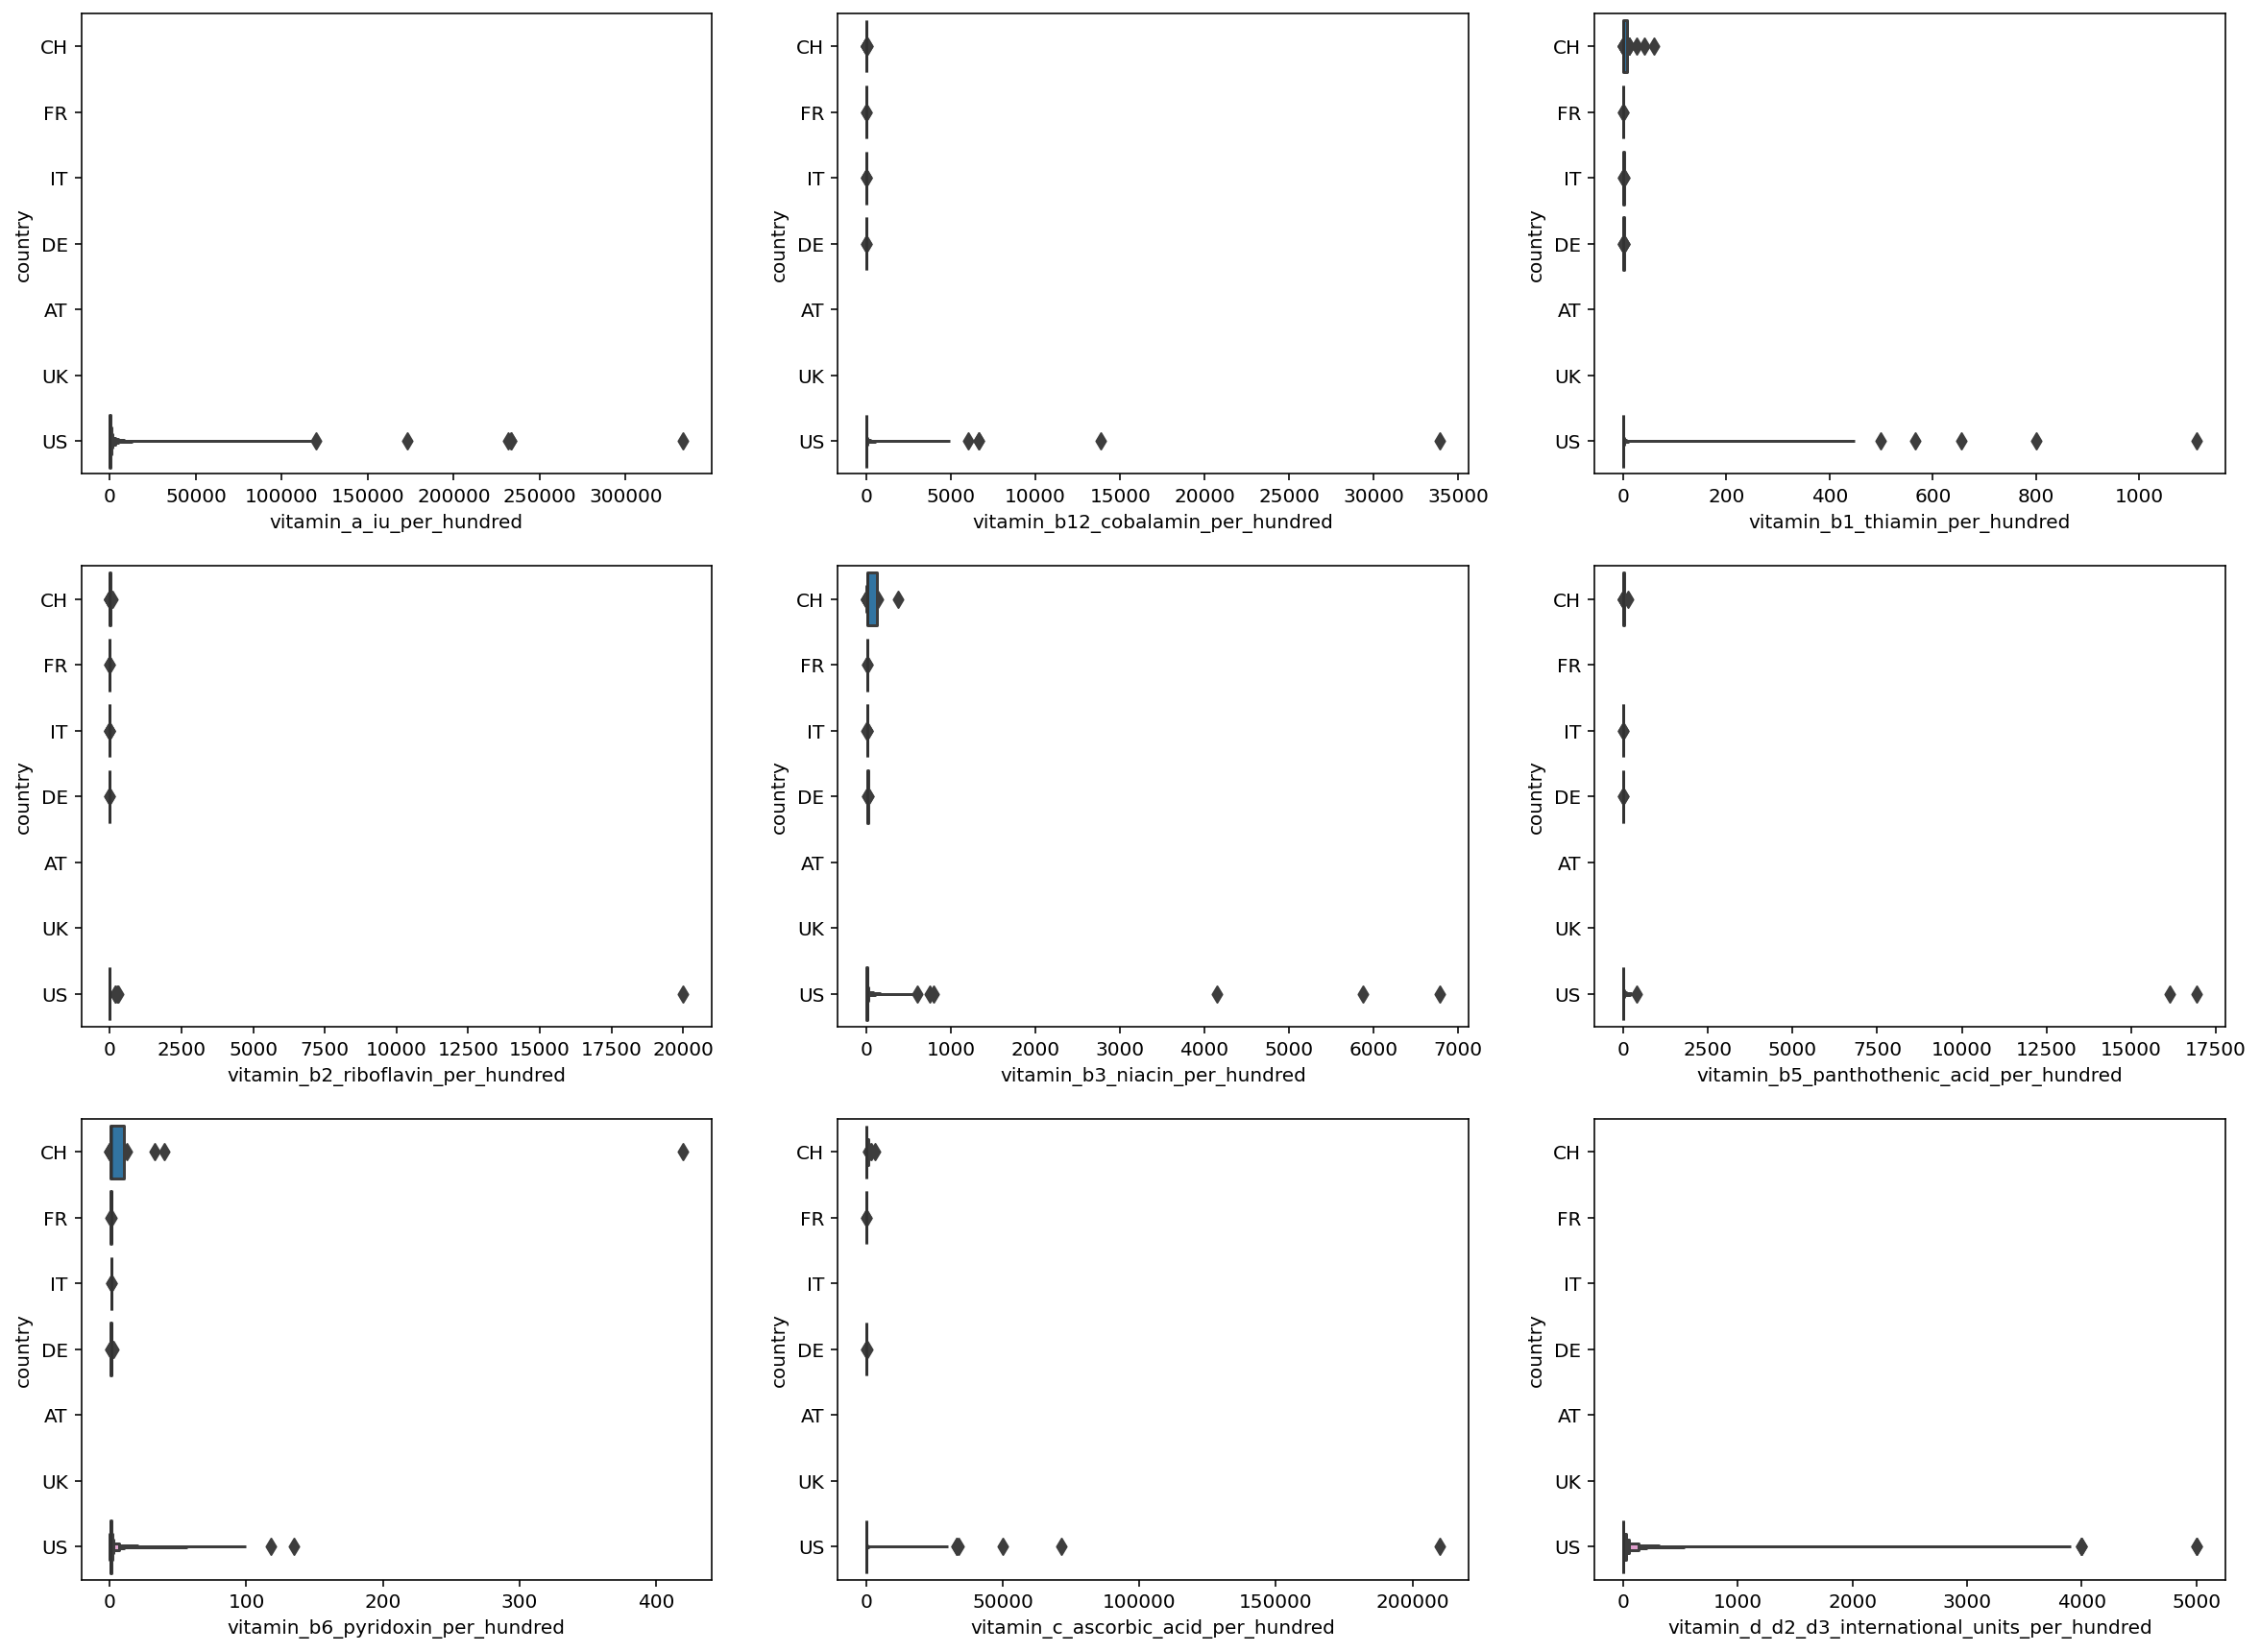

In [6]:
import numpy as np

# example data

names = df_openfood_vitamin.columns.drop('country')
ncols = len(names)
fig, axes = plt.subplots(3,3, figsize=(20, 15))


for name, ax in zip(names, axes.flatten()):
    sns.boxenplot(x=name, y= "country", data=df_openfood_vitamin, orient="h", ax=ax, showfliers = True)

- We check the distributions of each of the vitamins using **boxplots**:

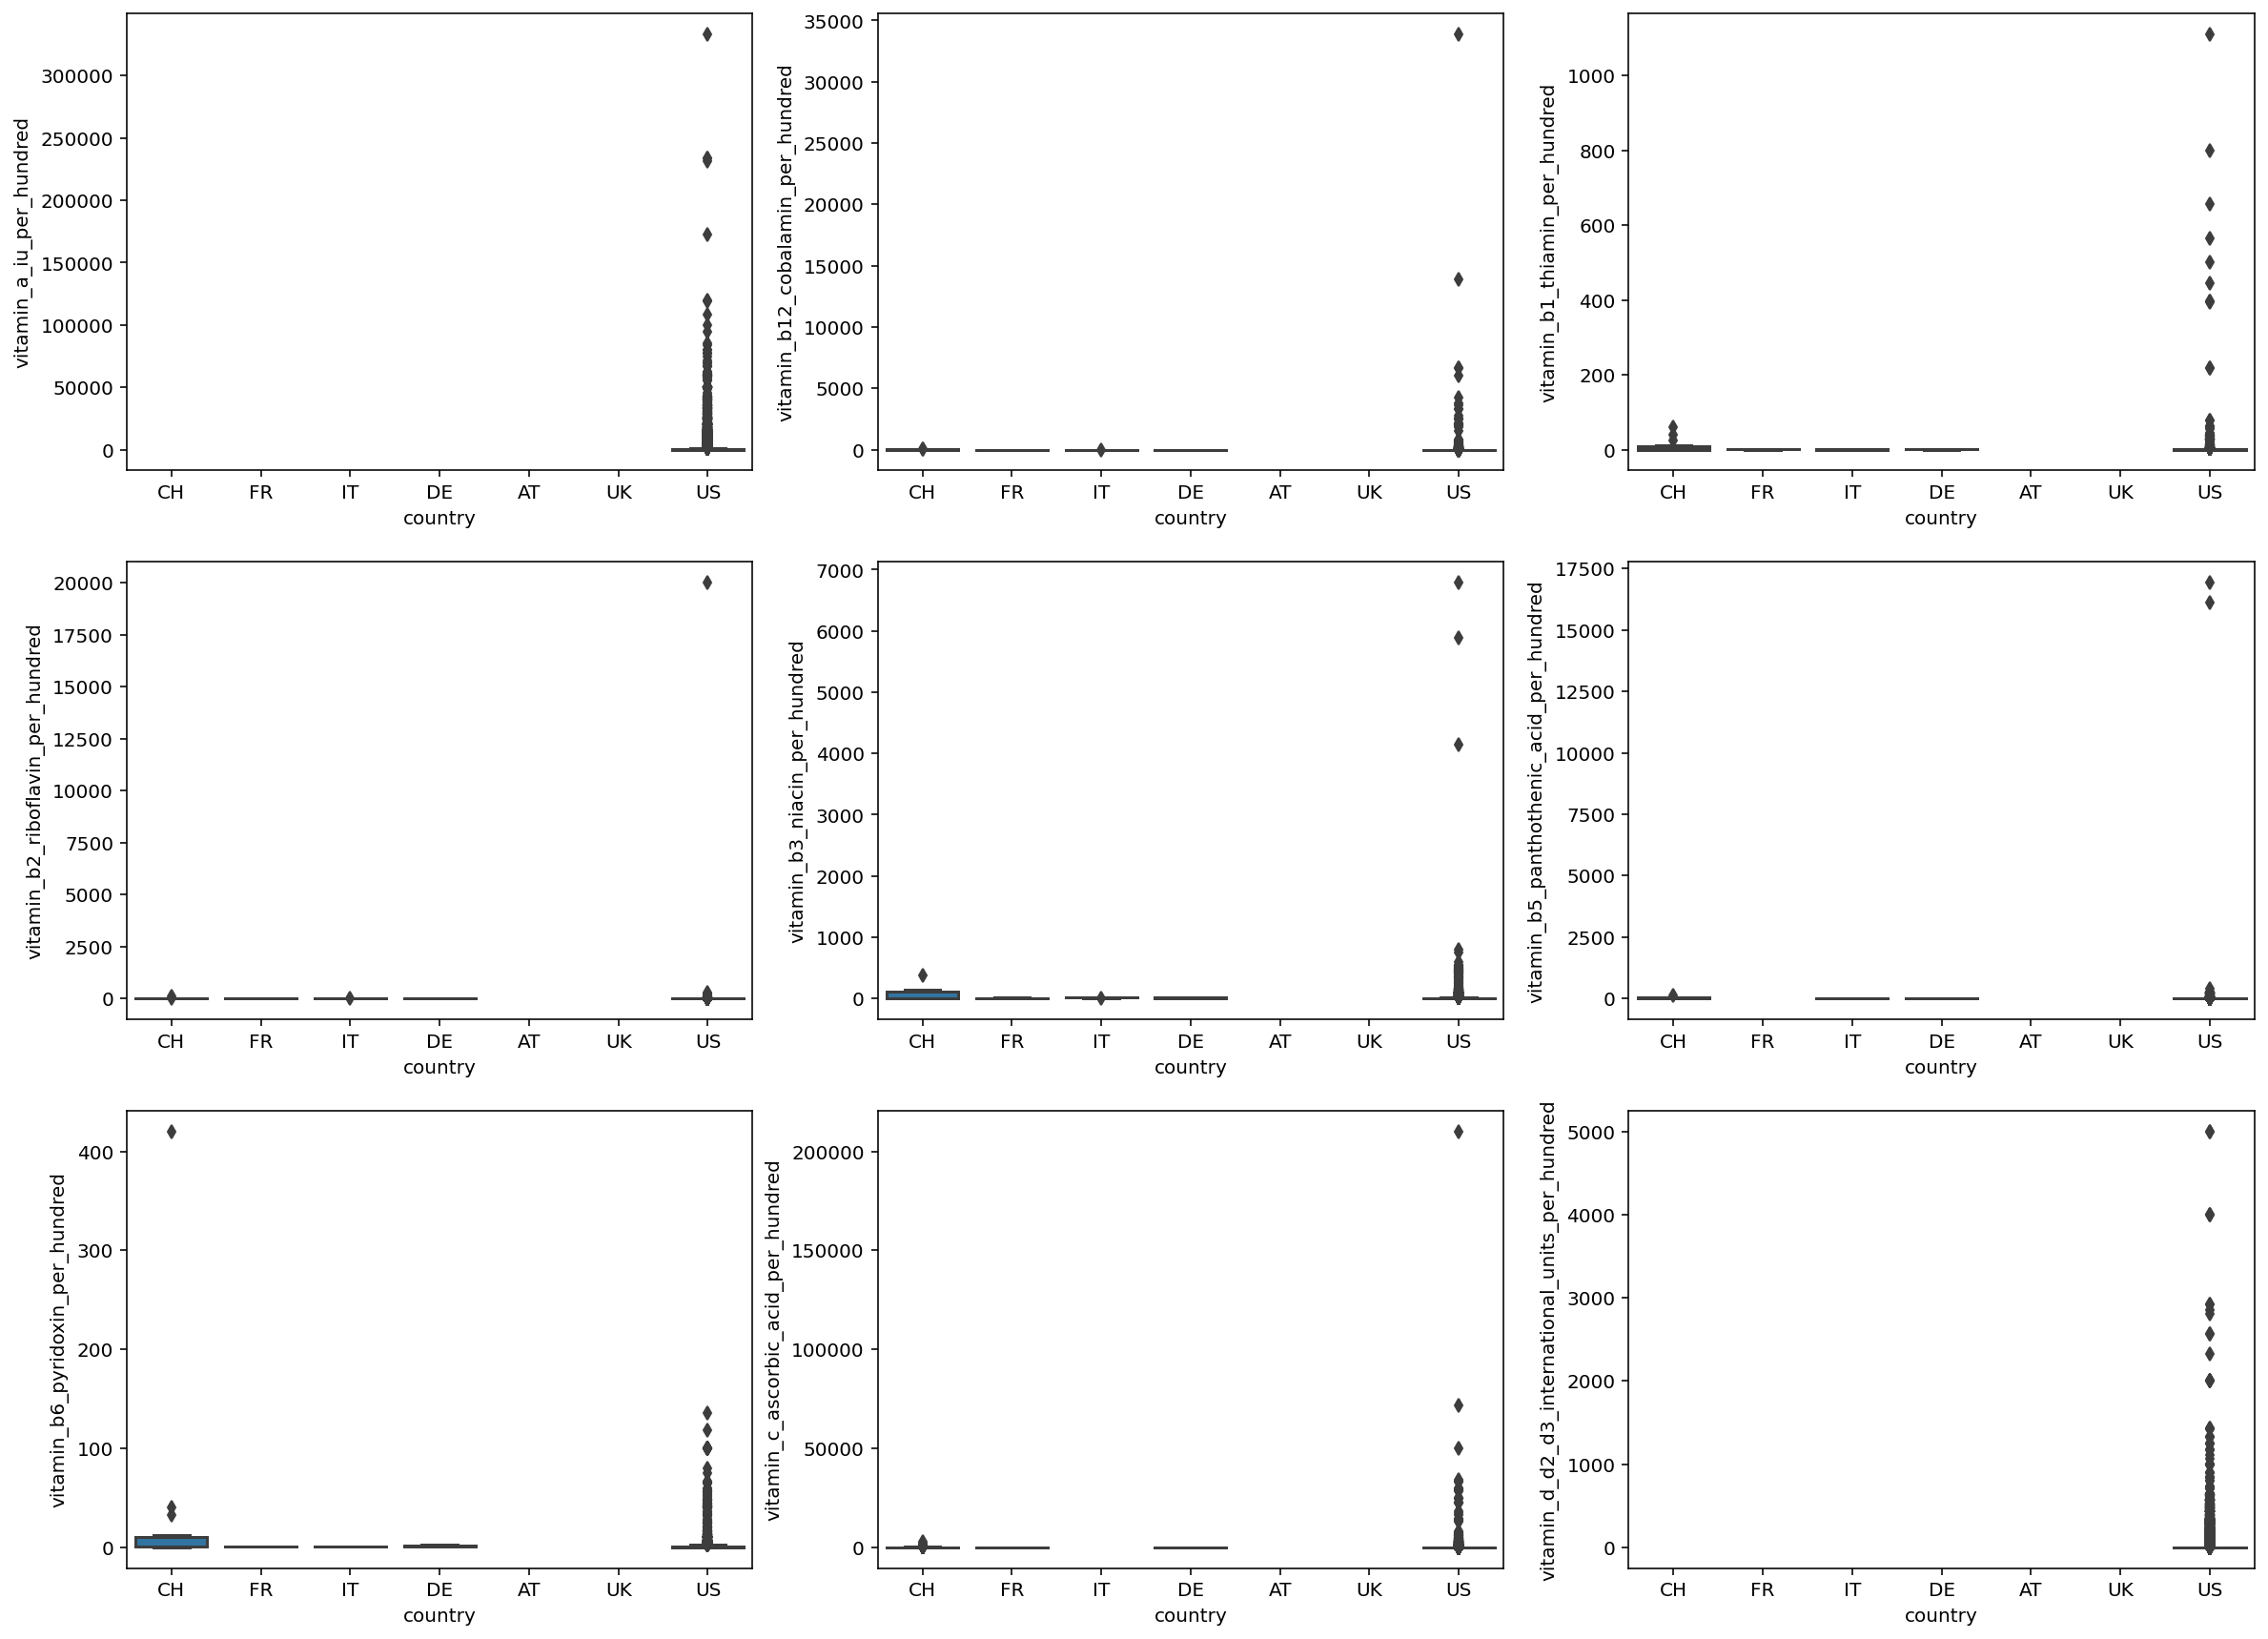

In [7]:
import numpy as np

names = df_openfood_vitamin.columns.drop('country')
ncols = len(names)
fig, axes = plt.subplots(3,3, figsize=(20, 15))


for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x="country", y= name, data=df_openfood_vitamin, orient="v", ax=ax, showfliers = True)

The distributions obtained with the boxenplots or the boxplots are not very informative. They are really flat. This is probably the effect of some really high values, outliers or errors. So let's try to remove these.

**Removal of the extreme values** :

- Let's first take a look at some basic stats about our vitamins features :

In [8]:
df_openfood_vitamin.describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
vitamin_a_iu_per_hundred,192093.0,494.23671,2445.25115,0.0,0.0000,0.00,352.00,333333.00
vitamin_b12_cobalamin_per_hundred,9874.0,17.47891,402.94673,0.0,0.4425,1.68,4.50,33898.31
vitamin_b1_thiamin_per_hundred,20527.0,0.96993,13.46113,0.0,0.0000,0.00,1.00,1111.00
vitamin_b2_riboflavin_per_hundred,19808.0,1.73576,142.16128,0.0,0.2000,0.34,0.61,20000.00
vitamin_b3_niacin_per_hundred,21242.0,10.49469,73.34943,0.0,3.0200,5.00,8.33,6785.71
vitamin_b5_panthothenic_acid_per_hundred,4666.0,14.26975,342.92186,0.0,0.6200,1.43,3.57,16920.47
vitamin_b6_pyridoxin_per_hundred,13364.0,1.48070,6.12759,0.0,0.1700,0.53,1.28,420.00
vitamin_c_ascorbic_acid_per_hundred,200256.0,16.00405,583.40260,0.0,0.0000,0.00,4.00,210000.00
vitamin_d_d2_d3_international_units_per_hundred,67024.0,14.18652,73.26252,0.0,0.0000,0.00,0.00,5000.00


**Using Z-Scores :**

In [9]:
df_openfood_vitamin.loc[:, df_openfood_vitamin.columns != "country"]

,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
385379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385380,NaN,18.75,8.25,10.5,120.0,45.0,10.5,500.0,NaN
385381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We create the filter :

In [10]:
zfilter_df_vitamin = (np.abs(
    df_openfood_vitamin.loc[:, df_openfood_vitamin.columns != "country"] - 
    df_openfood_vitamin.loc[:, df_openfood_vitamin.columns != "country"].mean()) > 
    (3 * df_openfood_vitamin.loc[:, df_openfood_vitamin.columns != "country"].std()))

In [11]:
zfilter_df_vitamin.head(5)

,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


- Now, we create a filter of our outliers :

In [12]:
zfilter_any = zfilter_df_vitamin.any(axis=1)
zfilter_any.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [13]:
outliers_vitamin = df_openfood_vitamin.loc[zfilter_any, :]
outliers_vitamin.shape

(2739, 10)

In [14]:
outliers_vitamin.head()

,country,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
13953,CH,NaN,0.15,60.0,80.00,0.4,0.5,40.0,10.0,NaN
42896,CH,NaN,58.10,25.6,32.60,372.0,139.5,32.6,1860.0,NaN
43870,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,NaN
44680,CH,NaN,1.50,NaN,NaN,NaN,NaN,420.0,NaN,NaN
45180,US,105.0,0.00,1.0,0.11,3.4,NaN,0.4,13.0,561.0


We can now define a new DataFrame where the rows with outliers are dropped:

In [15]:
df_openfood_vitamin_wo = df_openfood_vitamin.drop(outliers_vitamin.index, axis=0)

In [16]:
print(df_openfood_vitamin.shape, df_openfood_vitamin_wo.shape)
print(outliers_vitamin.shape)
print(df_openfood_vitamin.shape[0] - df_openfood_vitamin_wo.shape[0])

(385384, 10) (382645, 10)
(2739, 10)
2739


#### **Distributions of the vitamins using boxplots and boxenplots WITHOUT OUTLIERS :**

In [17]:
df_openfood_vitamin_wo.describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
vitamin_a_iu_per_hundred,189668.0,334.47073,796.71679,0.0,0.00,0.00,333.00,7824.00
vitamin_b12_cobalamin_per_hundred,9213.0,4.98970,29.50663,0.0,0.38,1.33,3.66,809.03
vitamin_b1_thiamin_per_hundred,19755.0,0.59333,1.25400,0.0,0.00,0.00,1.00,41.00
vitamin_b2_riboflavin_per_hundred,19032.0,0.57638,3.02904,0.0,0.19,0.33,0.52,294.12
vitamin_b3_niacin_per_hundred,20508.0,8.01744,15.19358,0.0,2.94,4.71,7.41,200.00
vitamin_b5_panthothenic_acid_per_hundred,4322.0,4.07834,10.25870,0.0,0.59,1.38,2.94,138.46
vitamin_b6_pyridoxin_per_hundred,12513.0,1.01813,1.89505,0.0,0.16,0.48,1.07,16.67
vitamin_c_ascorbic_acid_per_hundred,197858.0,8.55197,45.15910,0.0,0.00,0.00,3.80,1714.30
vitamin_d_d2_d3_international_units_per_hundred,66107.0,8.60591,27.78800,0.0,0.00,0.00,0.00,233.00


**Boxenplots :**

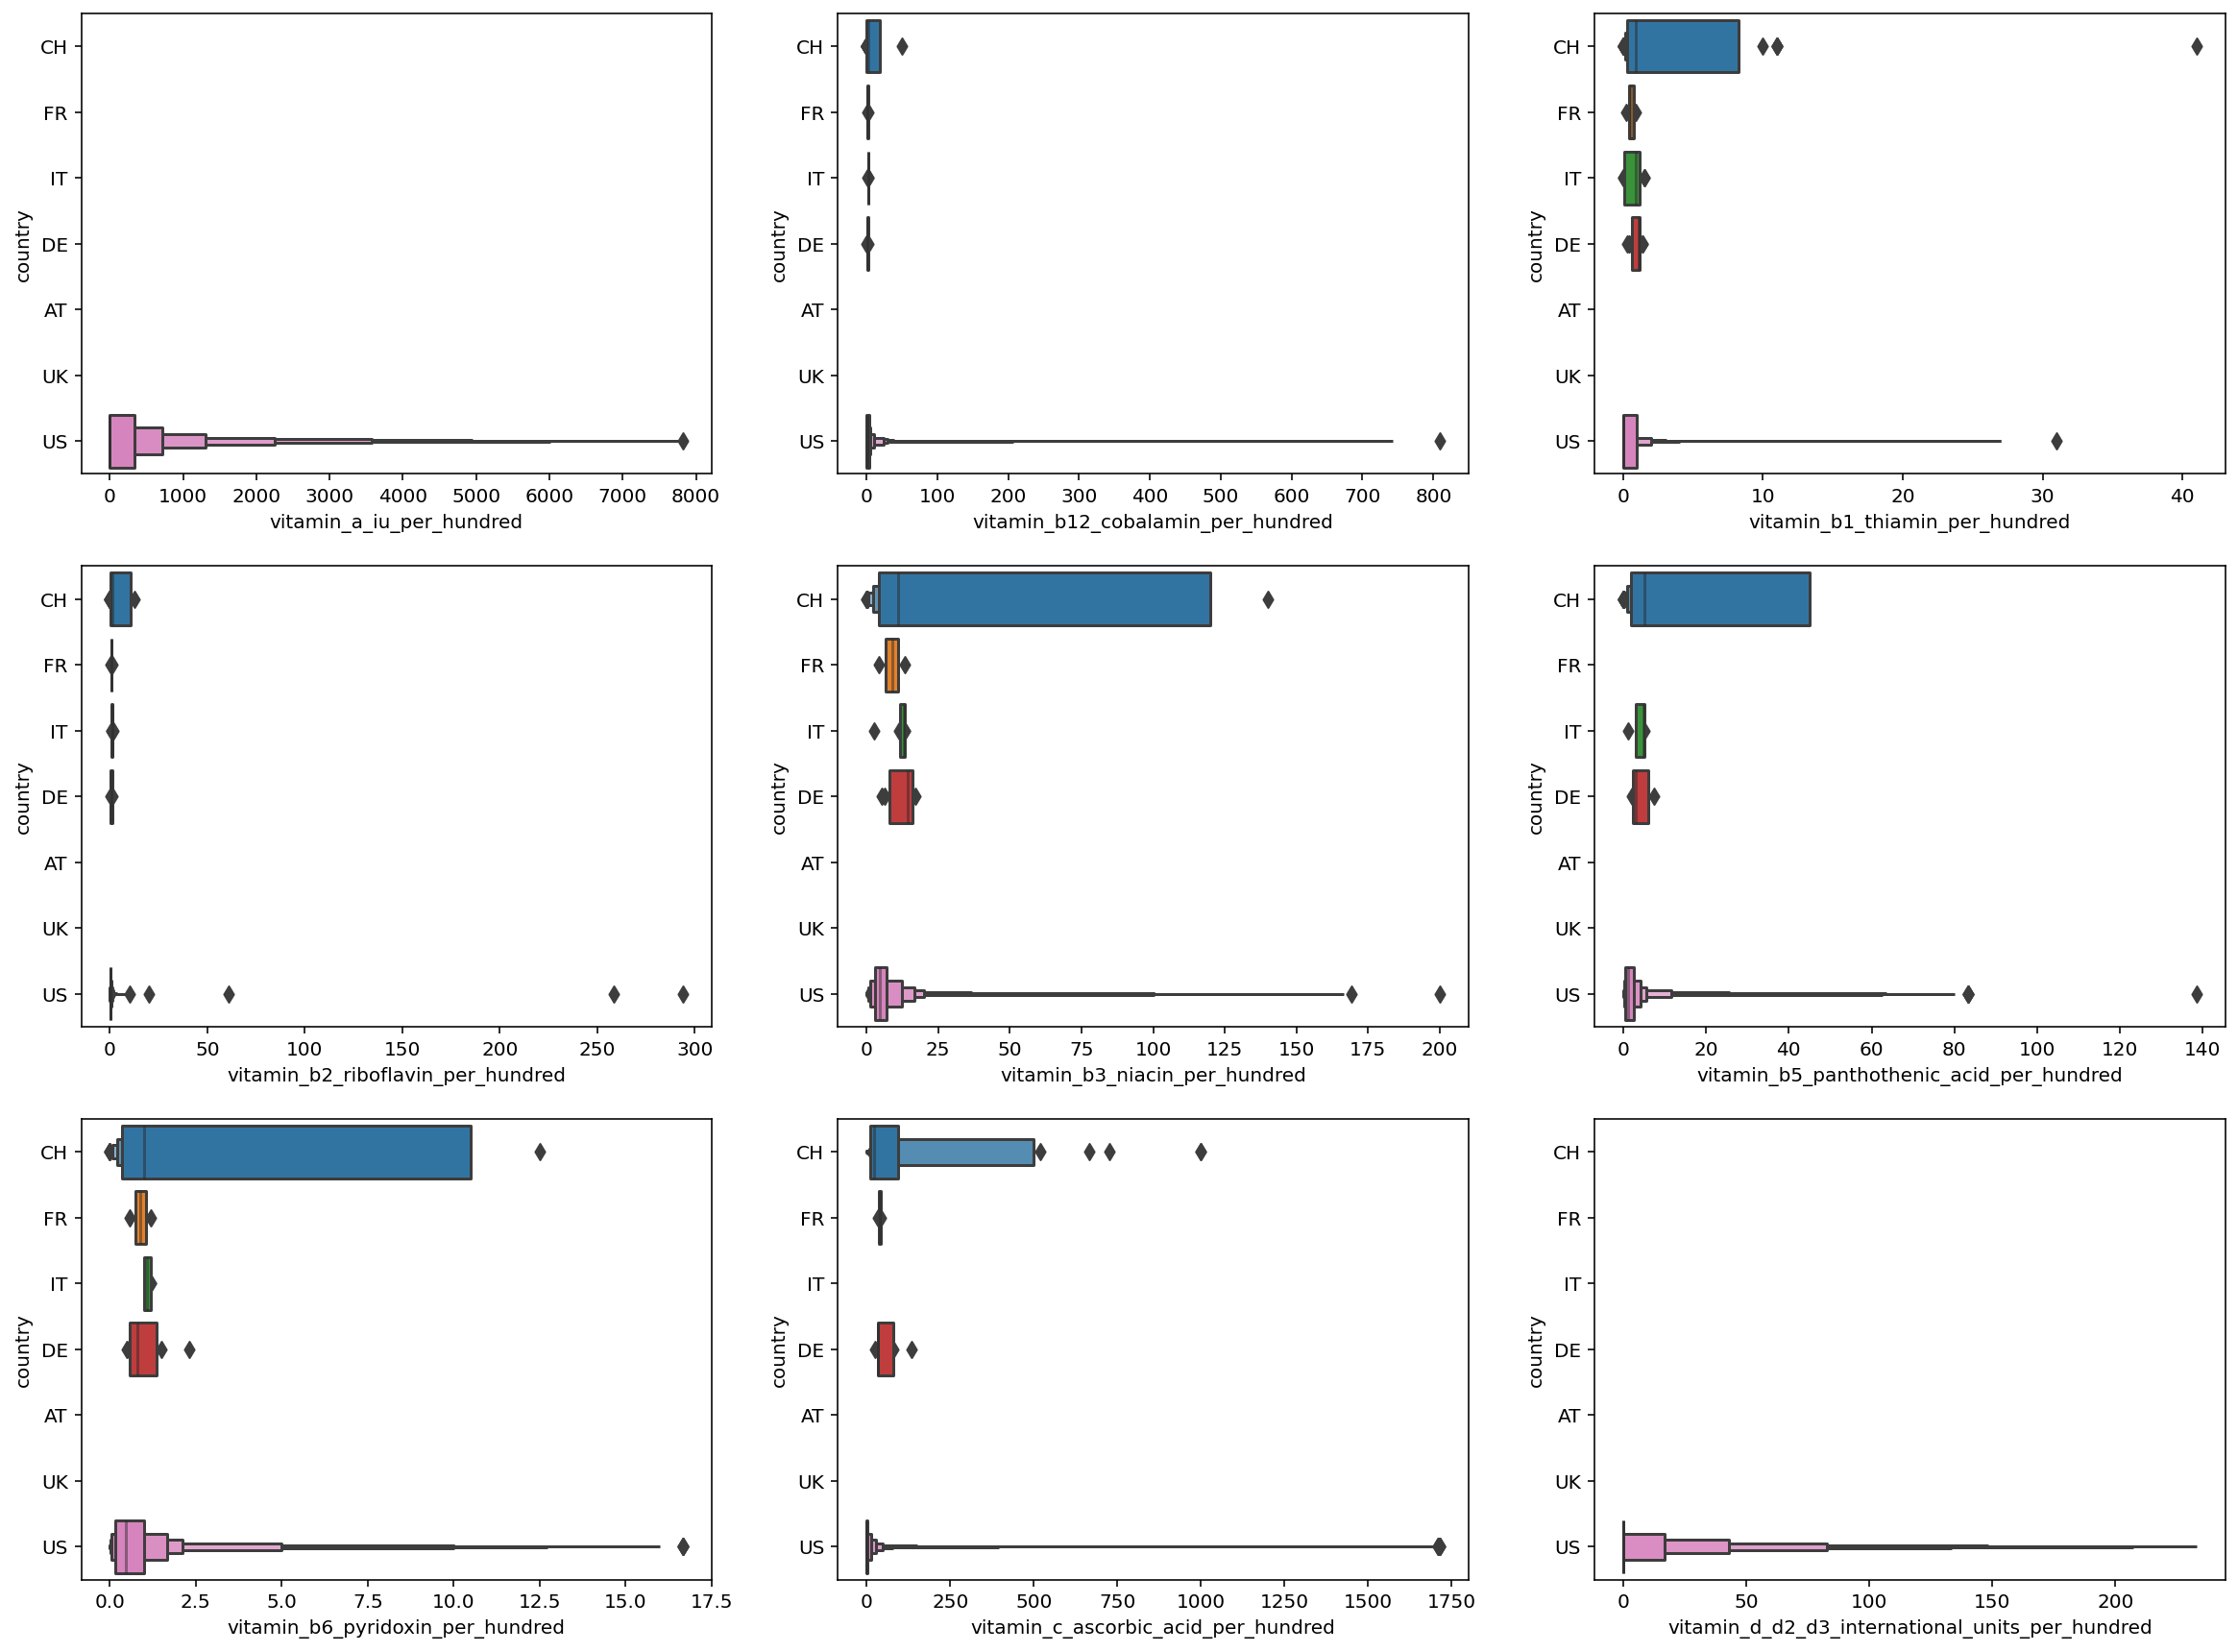

In [18]:
import numpy as np

names = df_openfood_vitamin_wo.columns.drop('country')
ncols = len(names)
fig, axes = plt.subplots(3,3, figsize=(20, 15))


for name, ax in zip(names, axes.flatten()):
    sns.boxenplot(x=name, y= "country", data=df_openfood_vitamin_wo, orient="h", ax=ax, showfliers = True)

**Boxplots:**

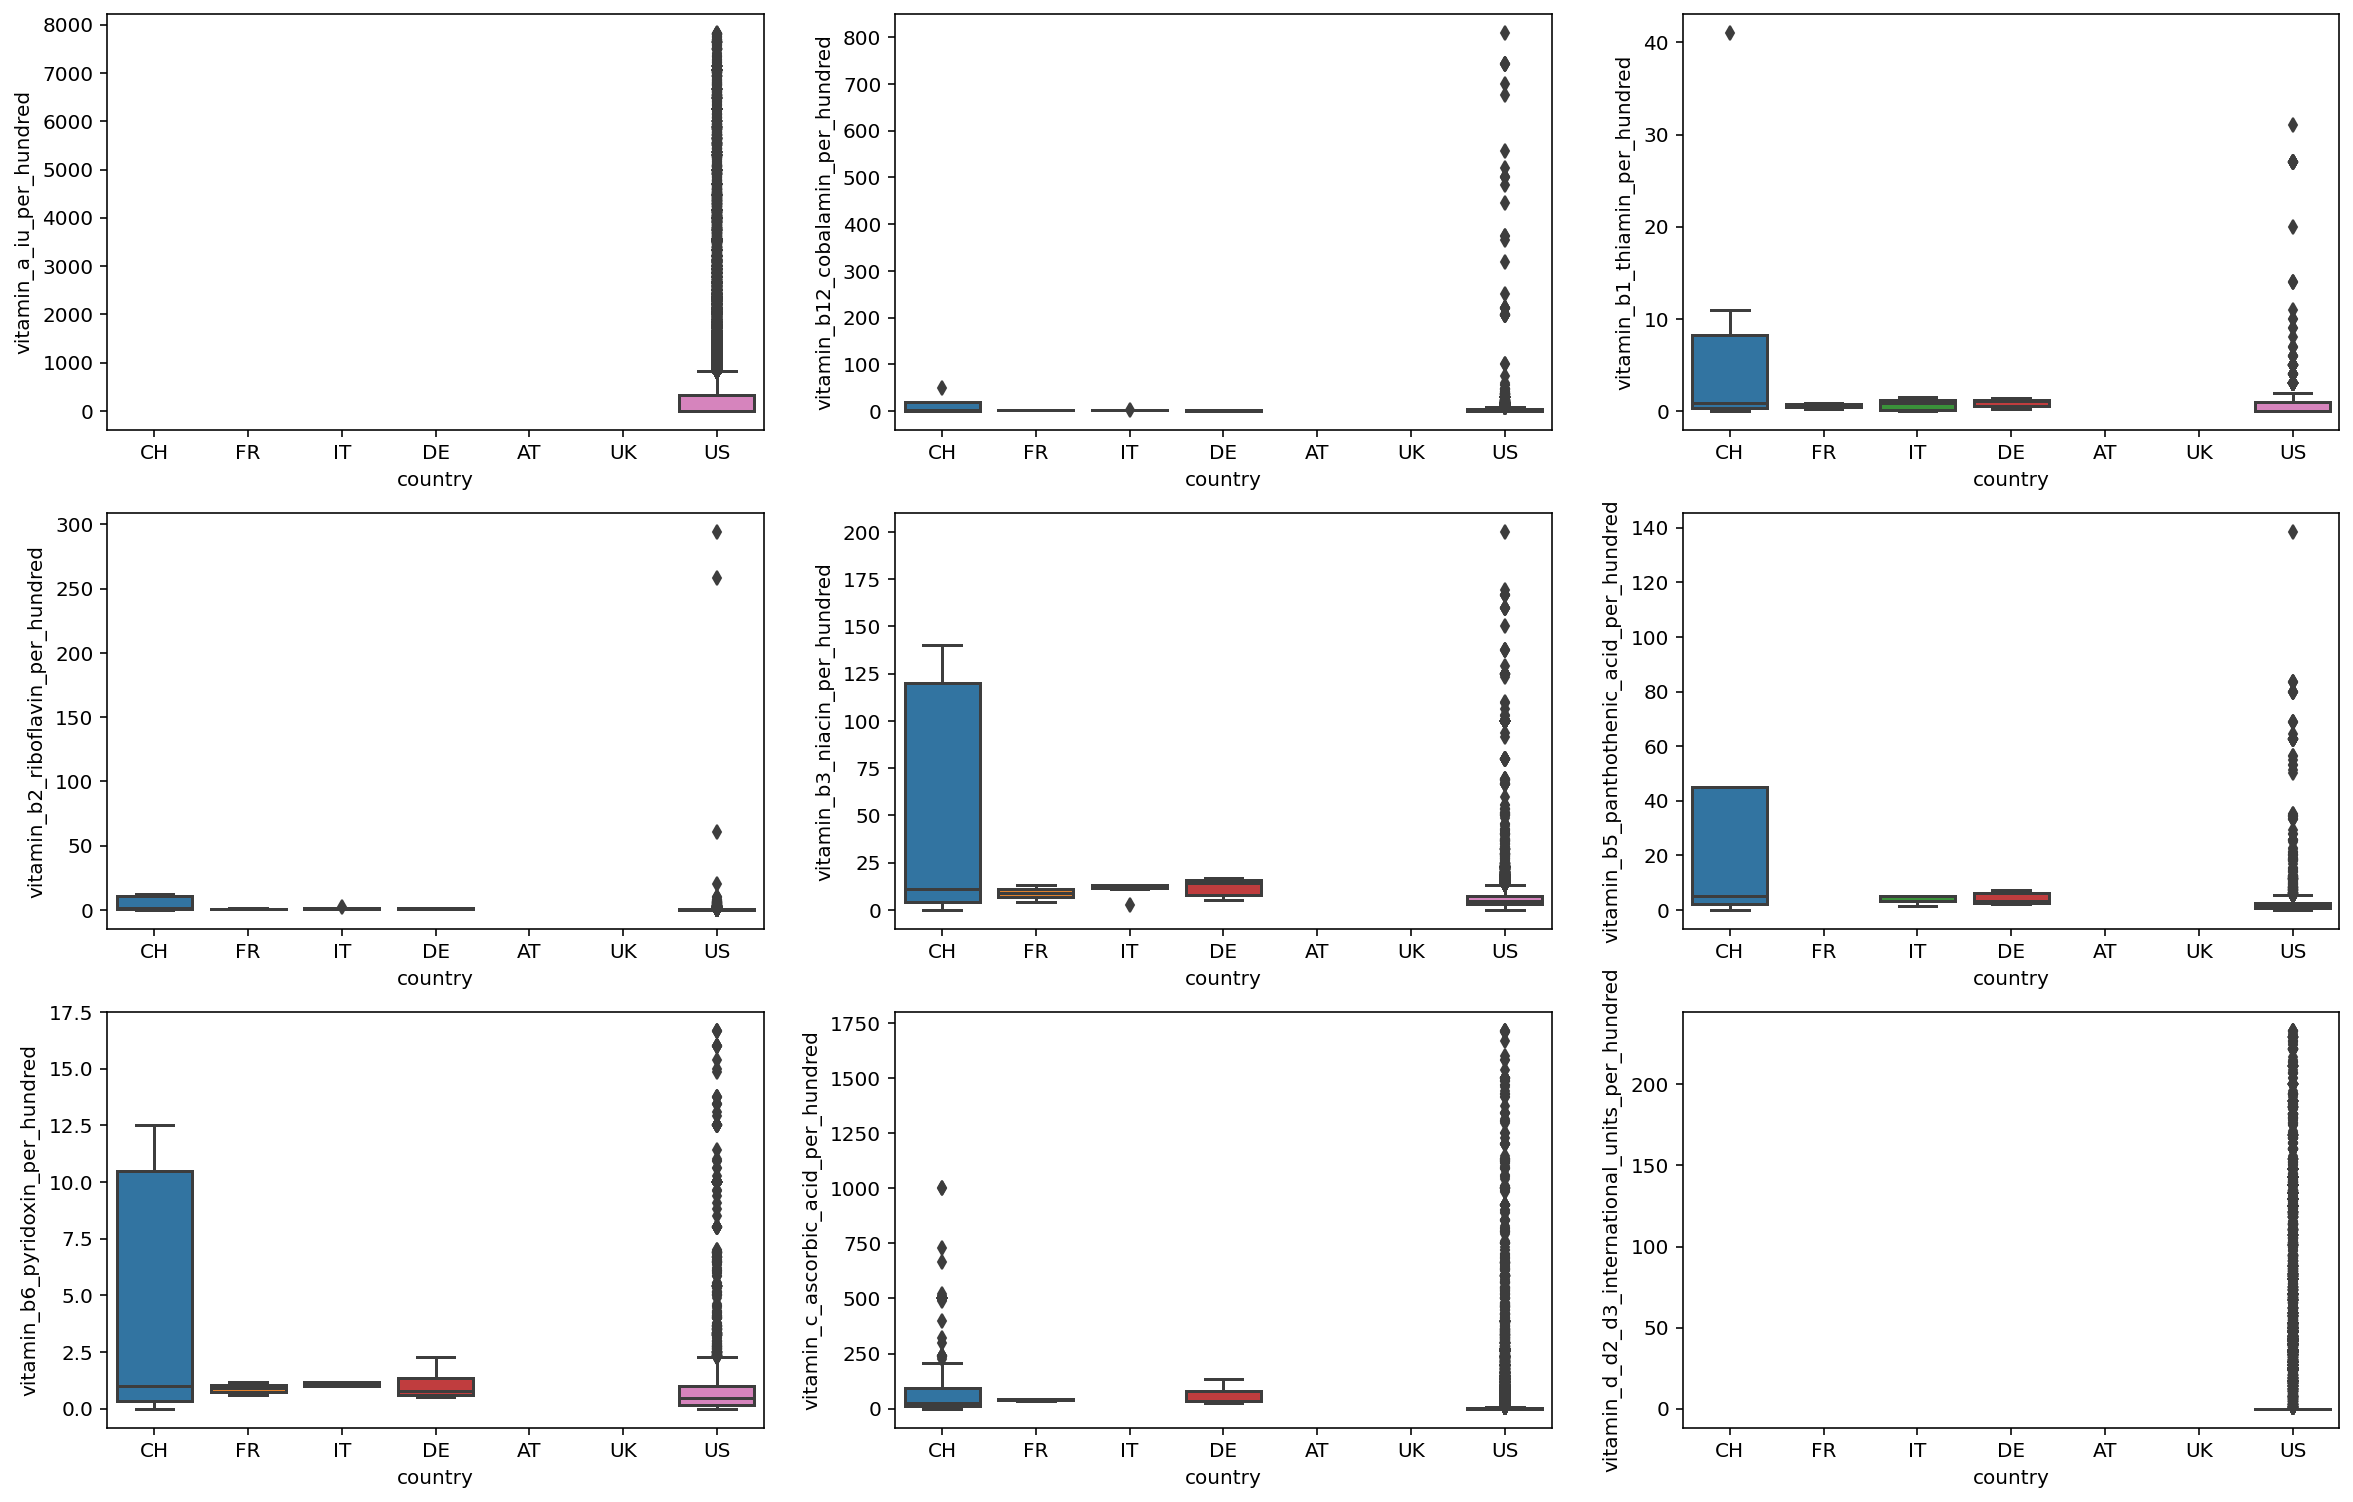

In [19]:
import numpy as np

names = df_openfood_vitamin_wo.columns.drop('country')
ncols = len(names)
fig, axes = plt.subplots(3,3, figsize=(20, 13))


for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x="country", y= name, data=df_openfood_vitamin_wo, orient="v", ax=ax, showfliers = True)

The distributions still seem odd. There might have been a problem with the conversion of quantities when entering the data.

#### **2. Your goal is to analyze organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names.**

- We create a new column ```is_organic``` that will contain "Yes" or "No" if a product is organic or not :

In [20]:
df_openfood.loc[df_openfood["product_name_en"].str.contains(r"(?:\s|^)Bio|Organic|bio|organic(?:\s|$)", 
                                                            na = False), "is_organic"] = "Yes"
df_openfood.loc[~df_openfood["product_name_en"].str.contains(r"(?:\s|^)Bio|Organic|bio|organic(?:\s|$)", 
                                                             na = False), "is_organic"] = "No"

In [21]:
df_openfood["is_organic"].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: is_organic, dtype: object

#### **2.1. Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?**

- We first make sure our ```is_organic```is of type "category" :

In [22]:
df_openfood["is_organic"] = pd.Categorical(df_openfood["is_organic"])

In [23]:
df_openfood["is_organic"].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

- We do the same for our country variable :

In [24]:
df_openfood["country"] = pd.Categorical(df_openfood["country"])

In [25]:
df_openfood["country"].dtypes

CategoricalDtype(categories=['AT', 'CH', 'DE', 'FR', 'IT', 'UK', 'US'], ordered=False)

- We create a ```crosstable``` to count the organic and non-organic products per country :

In [26]:
pd.crosstab(df_openfood["country"].cat.remove_categories(["AT", "UK"]),df_openfood["is_organic"], margins = True)

is_organic,No,Yes,All
country,,,
CH,42879,738,43617
DE,10580,59,10639
FR,117,1,118
IT,2714,5,2719
US,327808,481,328289
All,384098,1284,385382


In [27]:
pd.crosstab(df_openfood["country"].cat.remove_categories(["AT", "UK"]), df_openfood["is_organic"], normalize = 
            "index")*100

is_organic,No,Yes
country,,
CH,98.307999,1.692001
DE,99.445437,0.554563
FR,99.152542,0.847458
IT,99.816109,0.183891
US,99.853483,0.146517


By looking at the crosstable, we can say that Switzerland has a higher percentage of organic products than the other countries. It is not by large.

#### **2.2. Is there a difference in the nutrients’ distribution between organic and non-organic products in each country?**

We are going to work with the macronutrients this time and Wikipedia tells us that : **"There are three principal classes of macronutrients: carbohydrate, protein, and fat."**

- We select the data that interest us :

In [28]:
df_macronutr = df_openfood.loc[:,["country", "product_name_en", "carbohydrates_per_hundred", 
                                           "fat_per_hundred", "protein_per_hundred", "is_organic"]]
df_macronutr.head(3)

,country,product_name_en,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred,is_organic
0,CH,Bio Spaghetti,75.00,0.42,11.00,Yes
1,CH,Naturaplan Mozzarella,1.50,18.00,19.00,No
2,CH,Caffè Mauro - Roasted organic coffee blend,52.68,12.08,19.05,Yes


In [29]:
df_macronutr.shape

(385384, 6)

In [30]:
df_macronutr.head()

,country,product_name_en,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred,is_organic
0,CH,Bio Spaghetti,75.00,0.42,11.00,Yes
1,CH,Naturaplan Mozzarella,1.50,18.00,19.00,No
2,CH,Caffè Mauro - Roasted organic coffee blend,52.68,12.08,19.05,Yes
3,CH,Le chocolat Cailler - chocolate powder,70.40,7.90,6.80,No
4,CH,Naturaplan Extra Dark Chocolate 70%,37.00,44.00,8.00,No


- We look at our macronutrients' distributions with boxplots:

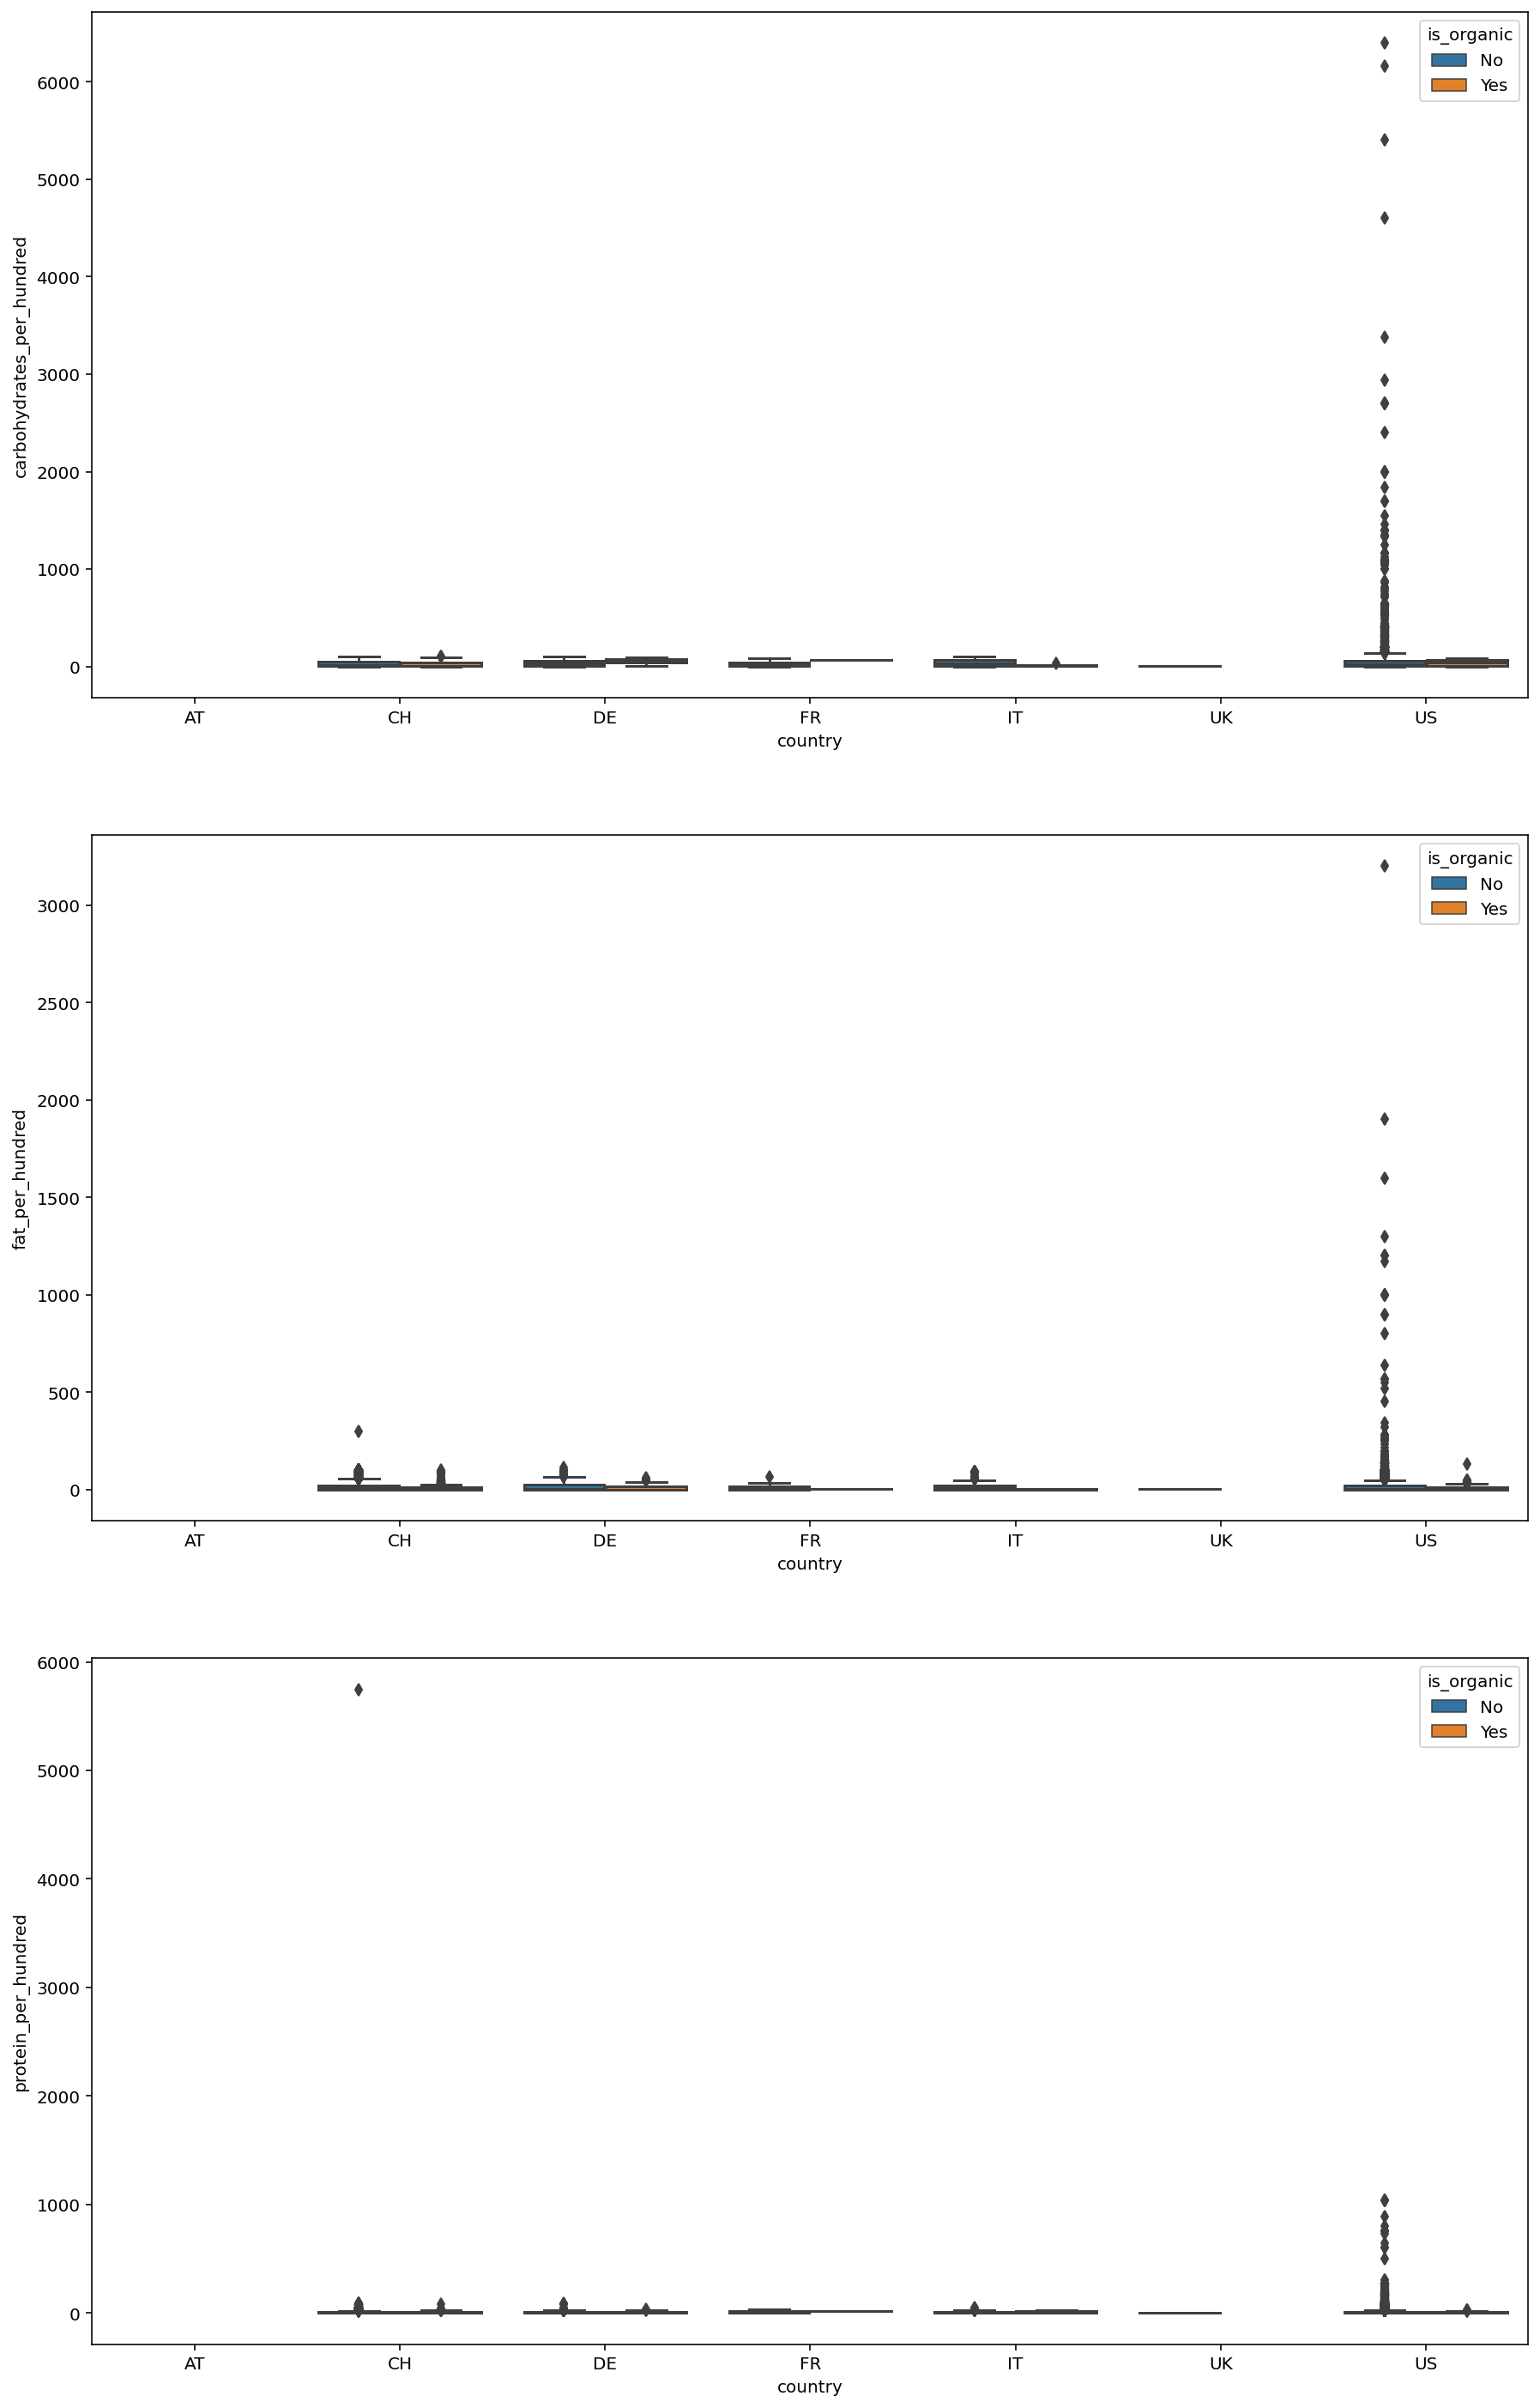

In [31]:
import numpy as np

names_macronutr = df_macronutr.columns.drop(["country", "product_name_en", "is_organic"])
ncols_macronutr = len(names_macronutr)
fig, axes = plt.subplots(3,1, figsize=(15, 25))


for name_macro, ax in zip(names_macronutr, axes.flatten()):
    sns.boxplot(x = "country", y = name_macro, data=df_macronutr, hue = "is_organic", orient="v", ax=ax)

Our boxplots look really flat. It can be because of really high values or errors.

**Removal of the extreme values** :

In [32]:
unit_columns_macronutr = df_openfood.loc[:,["carbohydrates_unit", "protein_unit", "fat_unit"]].columns.tolist()
unit_columns_macronutr

['carbohydrates_unit', 'protein_unit', 'fat_unit']

In [33]:
for col_macronutr in unit_columns_macronutr :
    print(col_macronutr, df_openfood[col_macronutr].unique())

carbohydrates_unit ['g' nan]
protein_unit ['g' nan]
fat_unit ['g' nan]


As these macronutrients are mesured in grams, the value in a single product cannot exceed 100g. So we are going to remove all values that exceed 100g.

- We filter the macronutrients (registered in g) :

In [34]:
macronutr_to_drop = df_openfood[["carbohydrates_per_hundred", "protein_per_hundred","fat_per_hundred"]].gt(100)
print(macronutr_to_drop.sum())

carbohydrates_per_hundred    1076
protein_per_hundred           172
fat_per_hundred               136
dtype: int64


In [35]:
macronutr_filter_any = macronutr_to_drop.any(axis = 1)

In [36]:
macronutr_errors = df_openfood.loc[macronutr_filter_any,:]
macronutr_errors.shape

(1170, 100)

In [37]:
df_openfood = df_openfood.drop(macronutr_errors.index, axis=0)
df_openfood.shape

(384214, 100)

- We create boxplots again this time with a dataframe without errors (i.e. values exceeding 100) :

In [38]:
df_macronutr_wo = df_openfood.loc[:,["country", "product_name_en", "carbohydrates_per_hundred", 
                                           "fat_per_hundred", "protein_per_hundred", "is_organic"]]
df_macronutr_wo.head(3)

,country,product_name_en,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred,is_organic
0,CH,Bio Spaghetti,75.00,0.42,11.00,Yes
1,CH,Naturaplan Mozzarella,1.50,18.00,19.00,No
2,CH,Caffè Mauro - Roasted organic coffee blend,52.68,12.08,19.05,Yes


In [39]:
df_macronutr_wo.describe().T

,count,mean,std,min,25%,50%,75%,max
carbohydrates_per_hundred,350411.0,33.196303,29.126348,0.0,6.67,23.33,59.52,100.0
fat_per_hundred,348082.0,12.595994,16.925769,0.0,0.00,5.45,20.00,100.0
protein_per_hundred,352505.0,7.119381,8.527214,0.0,0.42,4.55,10.00,100.0


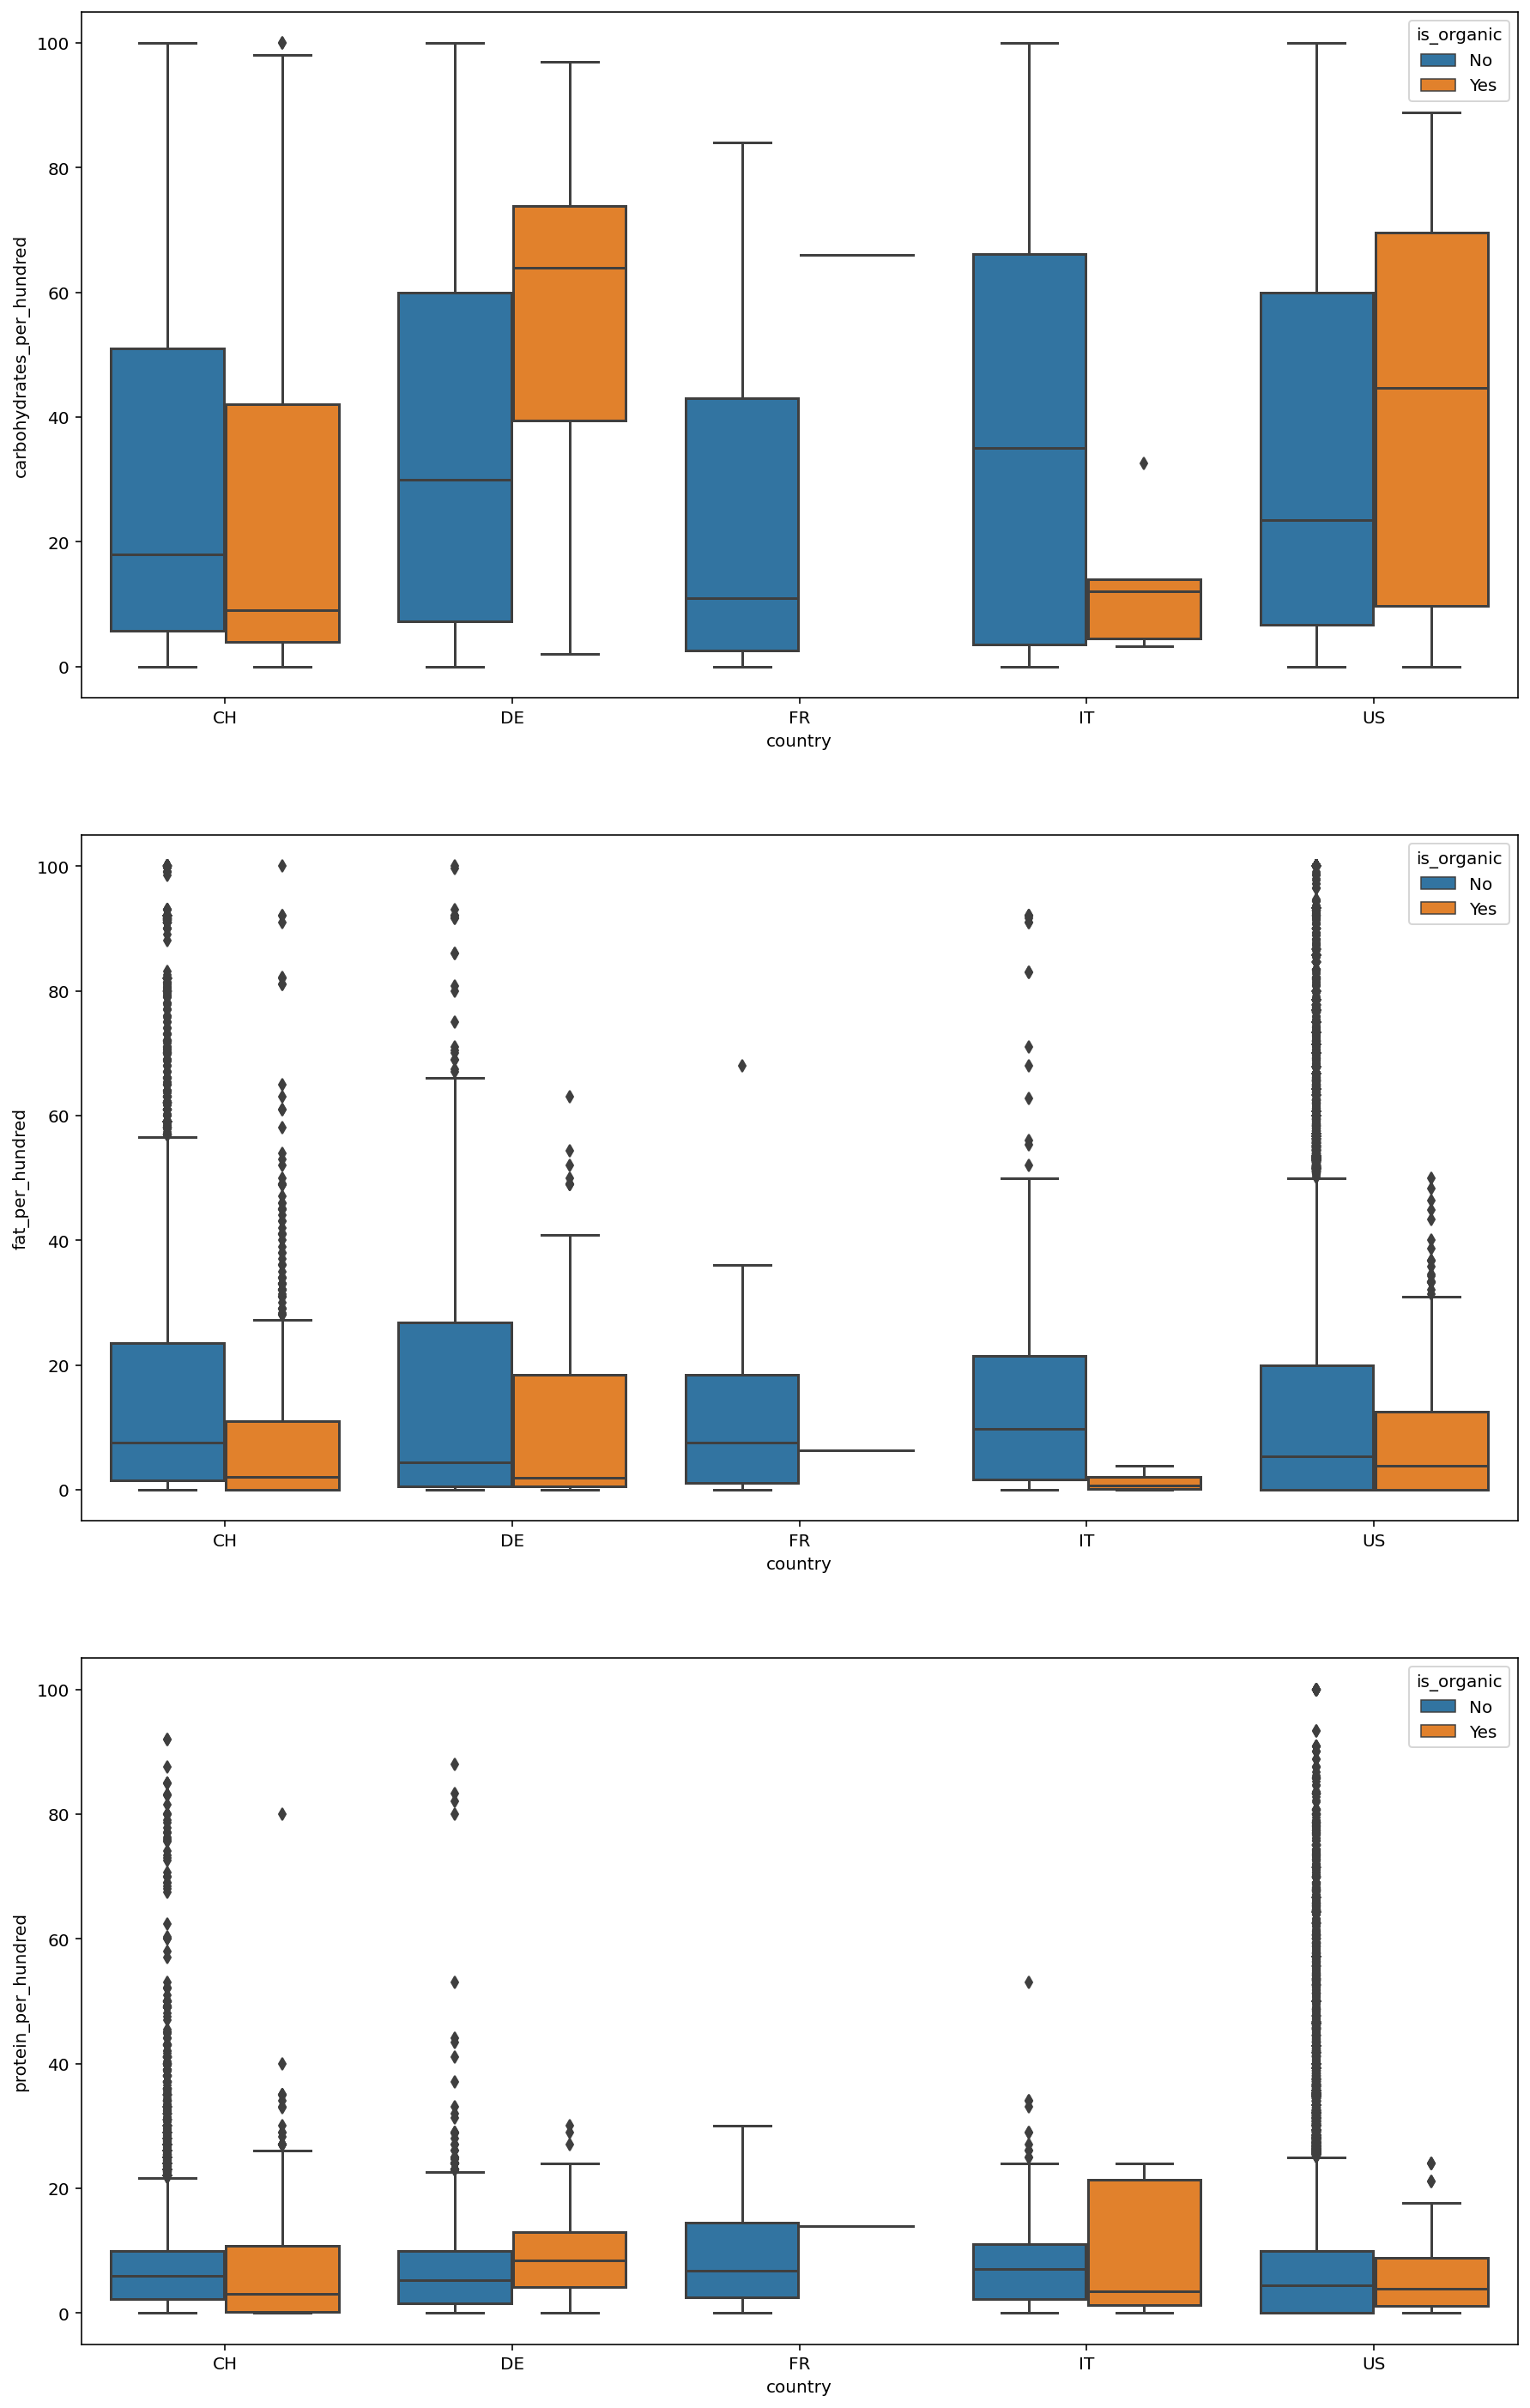

In [40]:
import numpy as np

names_macronutr_wo = df_macronutr_wo.columns.drop(["country", "product_name_en", "is_organic"])
ncols_macronutr_wo = len(names_macronutr_wo)
fig, axes = plt.subplots(3,1, figsize=(15, 25))

for name_macro_wo, ax in zip(names_macronutr_wo, axes.flatten()):
    sns.boxplot(x = df_macronutr_wo["country"].cat.remove_categories(["AT", "UK"]), 
                y = name_macro_wo, 
                data=df_macronutr_wo, 
                hue = "is_organic", 
                orient="v", 
                ax=ax)

We have a better view of the distributions of the macronutrients per country, but there are still some outliers that may bother us. So let's remove them using z-scores and see the resulting boxplots.

**Removal of outliers, using the Z-Scores**:

In [41]:
df_macronutr_wo.head()

,country,product_name_en,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred,is_organic
0,CH,Bio Spaghetti,75.00,0.42,11.00,Yes
1,CH,Naturaplan Mozzarella,1.50,18.00,19.00,No
2,CH,Caffè Mauro - Roasted organic coffee blend,52.68,12.08,19.05,Yes
3,CH,Le chocolat Cailler - chocolate powder,70.40,7.90,6.80,No
4,CH,Naturaplan Extra Dark Chocolate 70%,37.00,44.00,8.00,No


- We create the filter of the outliers :

In [42]:
zfilter_df_macronutr = (np.abs(
    df_macronutr_wo.drop(["country", "product_name_en", "is_organic"], axis = 1)) - 
    df_macronutr_wo.drop(["country", "product_name_en", "is_organic"], axis = 1).mean() > 
    (3 * df_macronutr_wo.drop(["country", "product_name_en", "is_organic"], axis = 1).std()))

In [43]:
zfilter_df_macronutr.head(5)

,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [44]:
zfilter_macronutr_any = zfilter_df_macronutr.any(axis=1)
zfilter_macronutr_any.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [45]:
outliers_macronutr = df_macronutr_wo.loc[zfilter_macronutr_any, :]
outliers_macronutr.shape

(12101, 6)

In [46]:
outliers_macronutr.head()

,country,product_name_en,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred,is_organic
55,CH,THOMY: Mayonnaise,0.3,81.3,0.8,No
56,CH,NaN,20.0,0.5,35.0,No
114,CH,Lou mas: Sunflower oil,0.0,100.0,0.0,No
177,CH,Naturaplan - Pine nuts,3.0,50.0,36.0,No
181,CH,Naturaplan - Organic mayonnaise,0.0,81.0,1.5,Yes


We can see that doing this would remove products that are mostly constitute by fat or are fat (i.e. Sunflower oil). But let's continue to see the results.

- We can now define a new DataFrame where the rows with outliers are dropped
:

In [47]:
df_macronutr_wo = df_macronutr_wo.drop(outliers_macronutr.index, axis=0)

In [48]:
df_macronutr_wo.head()

,country,product_name_en,carbohydrates_per_hundred,fat_per_hundred,protein_per_hundred,is_organic
0,CH,Bio Spaghetti,75.00,0.42,11.00,Yes
1,CH,Naturaplan Mozzarella,1.50,18.00,19.00,No
2,CH,Caffè Mauro - Roasted organic coffee blend,52.68,12.08,19.05,Yes
3,CH,Le chocolat Cailler - chocolate powder,70.40,7.90,6.80,No
4,CH,Naturaplan Extra Dark Chocolate 70%,37.00,44.00,8.00,No


- We plot again the boxplots (without exceeding values or too many outliers):

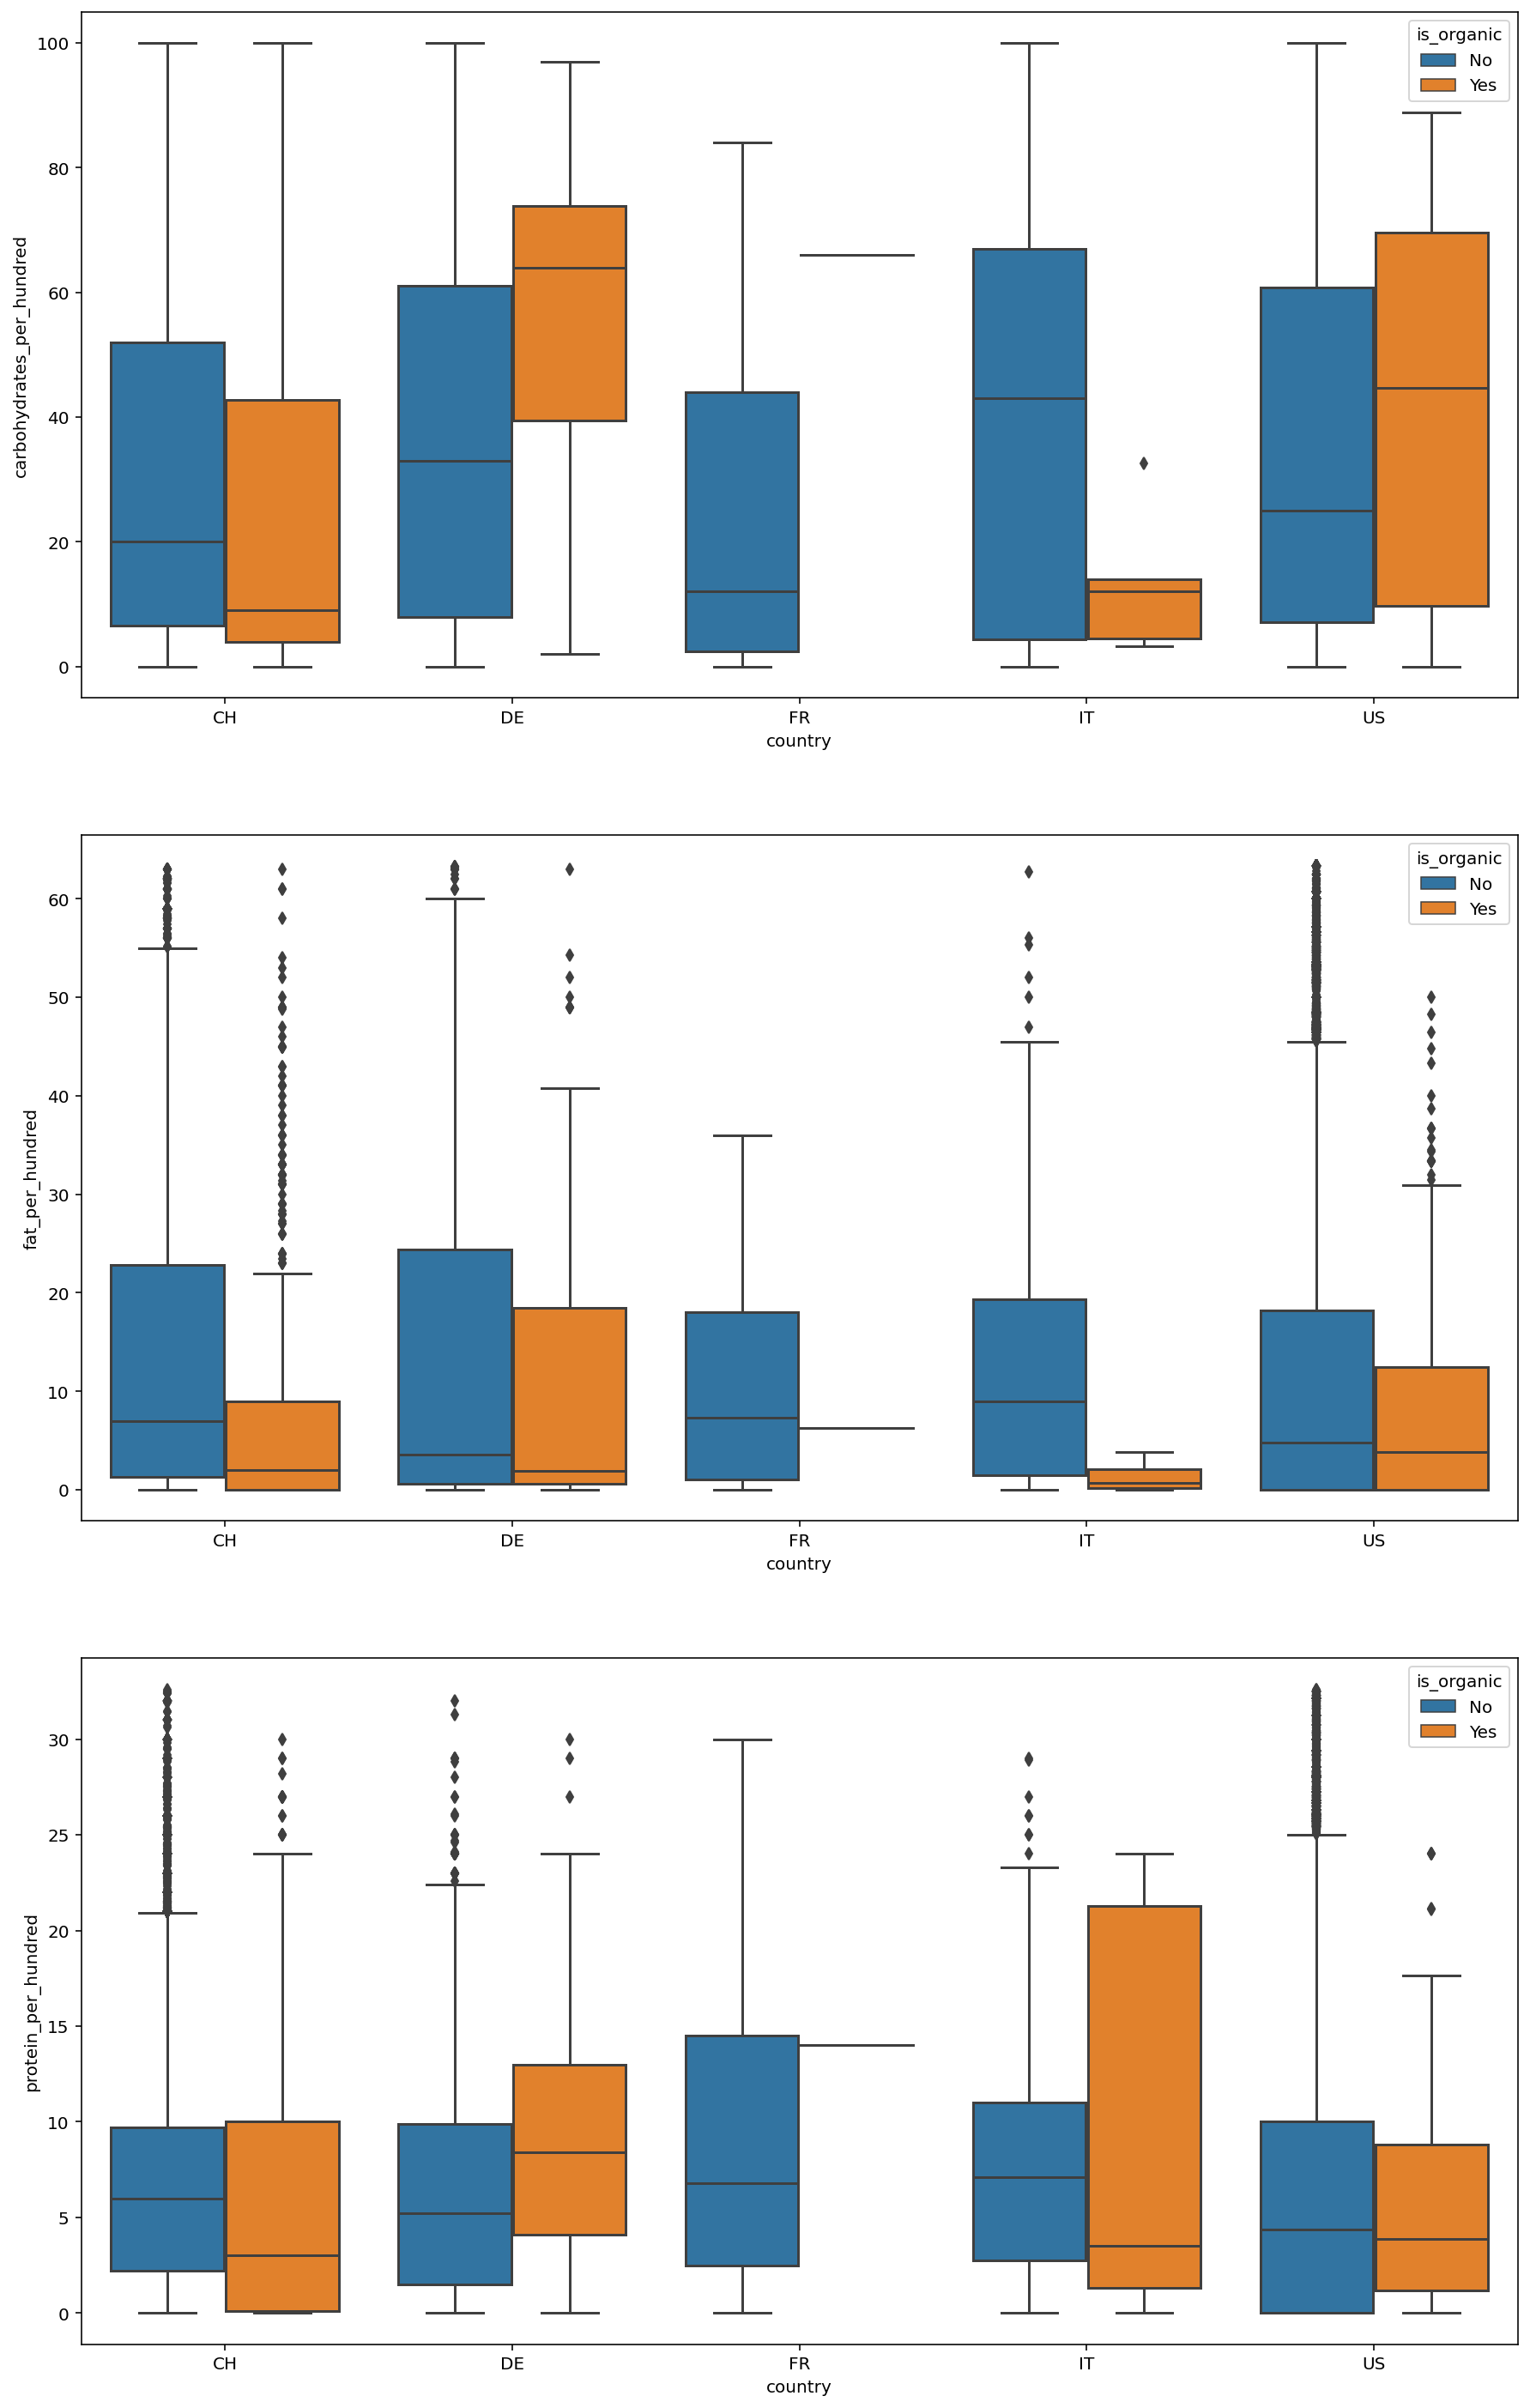

In [49]:
import numpy as np

names_macronutr_wo= df_macronutr_wo.columns.drop(["country", "product_name_en", "is_organic"])
ncols_macronutr_wo = len(names_macronutr_wo)
fig, axes = plt.subplots(3,1, figsize=(15, 25))

for name_macro_wo, ax in zip(names_macronutr_wo, axes.flatten()):
    sns.boxplot(x = df_macronutr_wo["country"].cat.remove_categories(["AT", "UK"]), 
                y = name_macro_wo, 
                data=df_macronutr_wo, 
                hue = "is_organic", 
                orient="v", 
                ax=ax)

The question was : **"Is there a difference in the nutrients’ distribution between organic and non-organic products in each country?"**

Based on these boxplots, we can say that :
- **For Switzerland** : There are lower proportions of macronutrients in organic products.
- **For Germany** : Organic products seem to have higher quantities of protein or carbohydrates. Fat proportions seem to be equivalent in organic and non-organic products. 
- **For FR** : We have only 1 organic product. It is difficult to draw conclusions.
- **For IT** : We have 5 organic products. It is difficult to draw conclusions as well.
- **For the US** : The distributions of protein and fat look fairly close. Concerning carbohydrates, we have higher proportions in organic products.

***Note*** : **There might have been a problem with the conversion of quantities when entering the data.**